# Autoencoder DNN

> Esse jupyter notebook será utilizando em palestras para demonstração de um autoencoder basico. Ainda está sendo aprimorado para deixa-lo mais didático

# Import dependecies

In [0]:
from keras.datasets import mnist
from keras.layers import Input, Dense
from keras.models import Model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Import dataset

In [0]:
(X_train, _), (X_test, _) = mnist.load_data()

## Pre processor

In [0]:
# Normalization

X_train = X_train.astype('float32')/255 
X_test = X_test.astype('float32')/255

In [0]:
# Resize

X_train = X_train.reshape(len(X_train), np.prod(X_train.shape[1:]))
X_test = X_test.reshape(len(X_test), np.prod(X_test.shape[1:]))

In [0]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

## Create model

In [0]:
# Input

input_img= Input(shape=(784,))

In [0]:
# Encoder

encoded = Dense(units=128, activation='relu')(input_img)
encoded = Dense(units=64, activation='relu')(encoded)
encoded = Dense(units=32, activation='relu')(encoded)

In [0]:
# Decoder 

decoded = Dense(units=64, activation='relu')(encoded)
decoded = Dense(units=128, activation='relu')(decoded)
decoded = Dense(units=784, activation='relu')(decoded)

In [0]:
autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)

In [0]:
autoencoder.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_9 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_10 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_11 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_12 (Dense)             (None, 784)               1011

In [0]:
encoder.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_9 (Dense)              (None, 32)                2080      
Total params: 110,816
Trainable params: 110,816
Non-trainable params: 0
_________________________________________________________________


In [0]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Train model

In [0]:
epochs = 10
batch_size = 256

autoencoder.fit(X_train, X_train,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True,
                validation_data=(X_test, X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 24us/step - loss: 0.2441 - acc: 0.8042 - val_loss: 0.2411 - val_acc: 0.8027
Epoch 2/10
60000/60000 [==============================] - 1s 23us/step - loss: 0.2415 - acc: 0.8045 - val_loss: 0.2363 - val_acc: 0.8044
Epoch 3/10
60000/60000 [==============================] - 1s 23us/step - loss: 0.2395 - acc: 0.8041 - val_loss: 0.2439 - val_acc: 0.8022
Epoch 4/10
60000/60000 [==============================] - 1s 23us/step - loss: 0.2581 - acc: 0.8015 - val_loss: 0.2542 - val_acc: 0.7998
Epoch 5/10
60000/60000 [==============================] - 1s 23us/step - loss: 0.2542 - acc: 0.8011 - val_loss: 0.2836 - val_acc: 0.8038
Epoch 6/10
60000/60000 [==============================] - 1s 23us/step - loss: 0.2468 - acc: 0.8022 - val_loss: 0.2419 - val_acc: 0.8028
Epoch 7/10
60000/60000 [==============================] - 1s 24us/step - loss: 0.2378 - acc: 0.8039 - val_loss: 0.2350 - val_acc

## Prediction

In [0]:
encoded_imgs = encoder.predict(X_test)
predicted = autoencoder.predict(X_test)

## Plot results

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


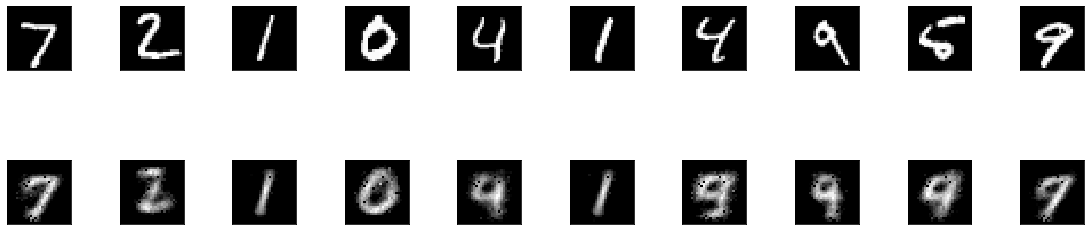

In [0]:
plt.figure(figsize=(40, 4))
for i in range(10):
    # display original images
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    

# display reconstructed images
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(encoded_imgs[i].reshape(4, 8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

# display reconstructed images
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(predicted[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  
    
plt.show()